In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
df = sns.load_dataset('penguins')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [99]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [100]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [101]:
df['island'].value_counts()

,count
island,
Biscoe,168
Dream,124
Torgersen,52


In [102]:
df.isna().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [103]:
df.dropna(inplace=True)

In [104]:
num_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
cat_cols = ['island', 'sex','species']

In [105]:
from scipy.stats import f_oneway
def checkanova(df,num,cat):
  p = f_oneway(*df.groupby(cat)[num].apply(list))[1]

  if p>=0.05 : print(f"accept H0, no correlation between {cat} and {num}")
  else : print(f"Reject H0, there is correlation between {cat} and {num}")

for i in num_cols:
  checkanova(df,i,'species')


Reject H0, there is correlation between species and bill_length_mm
Reject H0, there is correlation between species and bill_depth_mm
Reject H0, there is correlation between species and flipper_length_mm
Reject H0, there is correlation between species and body_mass_g


In [106]:
from sklearn.preprocessing import LabelEncoder

nonencoded = df.copy()

le = LabelEncoder()
for i in cat_cols:
  df[i] = le.fit_transform(nonencoded[i])
  print(df[i].value_counts())

island
0    163
1    123
2     47
Name: count, dtype: int64
sex
1    168
0    165
Name: count, dtype: int64
species
0    146
2    119
1     68
Name: count, dtype: int64


In [107]:
from sklearn.feature_selection import chi2

def check_chi2(df, cat, target):
  p = chi2(df[[cat]], df[target])[1]

  if p>=0.05 : print(f"accept H0, no correlation between {cat} and {target}")
  else : print(f"Reject H0, there is correlation between {cat} and {target}")

for i in cat_cols:
  check_chi2(df,i,'species')

Reject H0, there is correlation between island and species
accept H0, no correlation between sex and species
Reject H0, there is correlation between species and species


In [108]:
df.drop('sex',axis=1,inplace=True)

In [109]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,2,39.1,18.7,181.0,3750.0
1,0,2,39.5,17.4,186.0,3800.0
2,0,2,40.3,18.0,195.0,3250.0
4,0,2,36.7,19.3,193.0,3450.0
5,0,2,39.3,20.6,190.0,3650.0


In [110]:
x = df.drop('species',axis=1).values
y = df[['species']].values

In [111]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((266, 5), (67, 5), (266, 1), (67, 1))

In [112]:
from sklearn.preprocessing import StandardScaler

num_col_indices = [1, 2, 3, 4]

sc = StandardScaler()

xtrain_scaled = xtrain.copy()
xtest_scaled = xtest.copy()

xtrain_scaled[:, num_col_indices] = sc.fit_transform(xtrain[:, num_col_indices])
xtest_scaled[:, num_col_indices] = sc.transform(xtest[:, num_col_indices])

In [113]:
from sklearn.svm import SVC
svcmodel = SVC()
svcmodel.fit(xtrain_scaled,ytrain).score(xtest_scaled,ytest)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [114]:
yhatsvc = svcmodel.predict(xtest_scaled)

In [115]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

print(classification_report(ytest,yhatsvc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



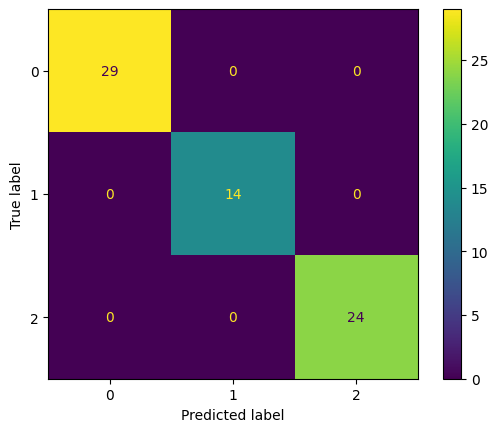

In [116]:
cm = confusion_matrix(ytest,yhatsvc)
ConfusionMatrixDisplay(cm).plot()

# Decision Tree

In [119]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,2,39.1,18.7,181.0,3750.0
1,0,2,39.5,17.4,186.0,3800.0
2,0,2,40.3,18.0,195.0,3250.0
4,0,2,36.7,19.3,193.0,3450.0
5,0,2,39.3,20.6,190.0,3650.0


In [121]:
x = df.drop('species',axis=1).values
y = df[['species']].values

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((266, 5), (67, 5), (266, 1), (67, 1))

In [123]:
from sklearn.tree import DecisionTreeClassifier

dtmodel = DecisionTreeClassifier(criterion='entropy')
dtmodel.fit(xtrain,ytrain).score(xtest,ytest)


0.9552238805970149

In [125]:
yhatdt = dtmodel.predict(xtest)
print(classification_report(ytest,yhatdt))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.88      1.00      0.93        14
           2       1.00      0.92      0.96        24

    accuracy                           0.96        67
   macro avg       0.95      0.96      0.95        67
weighted avg       0.96      0.96      0.96        67



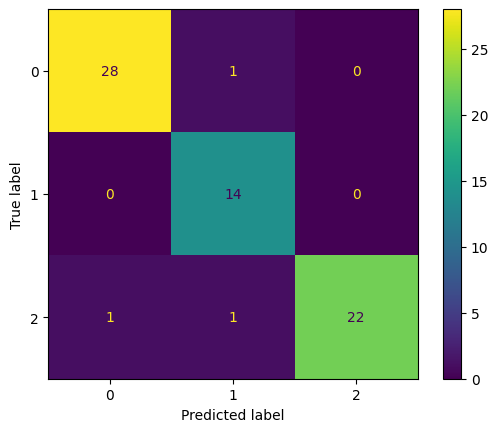

In [126]:
cm = confusion_matrix(ytest,yhatdt)
ConfusionMatrixDisplay(cm).plot()

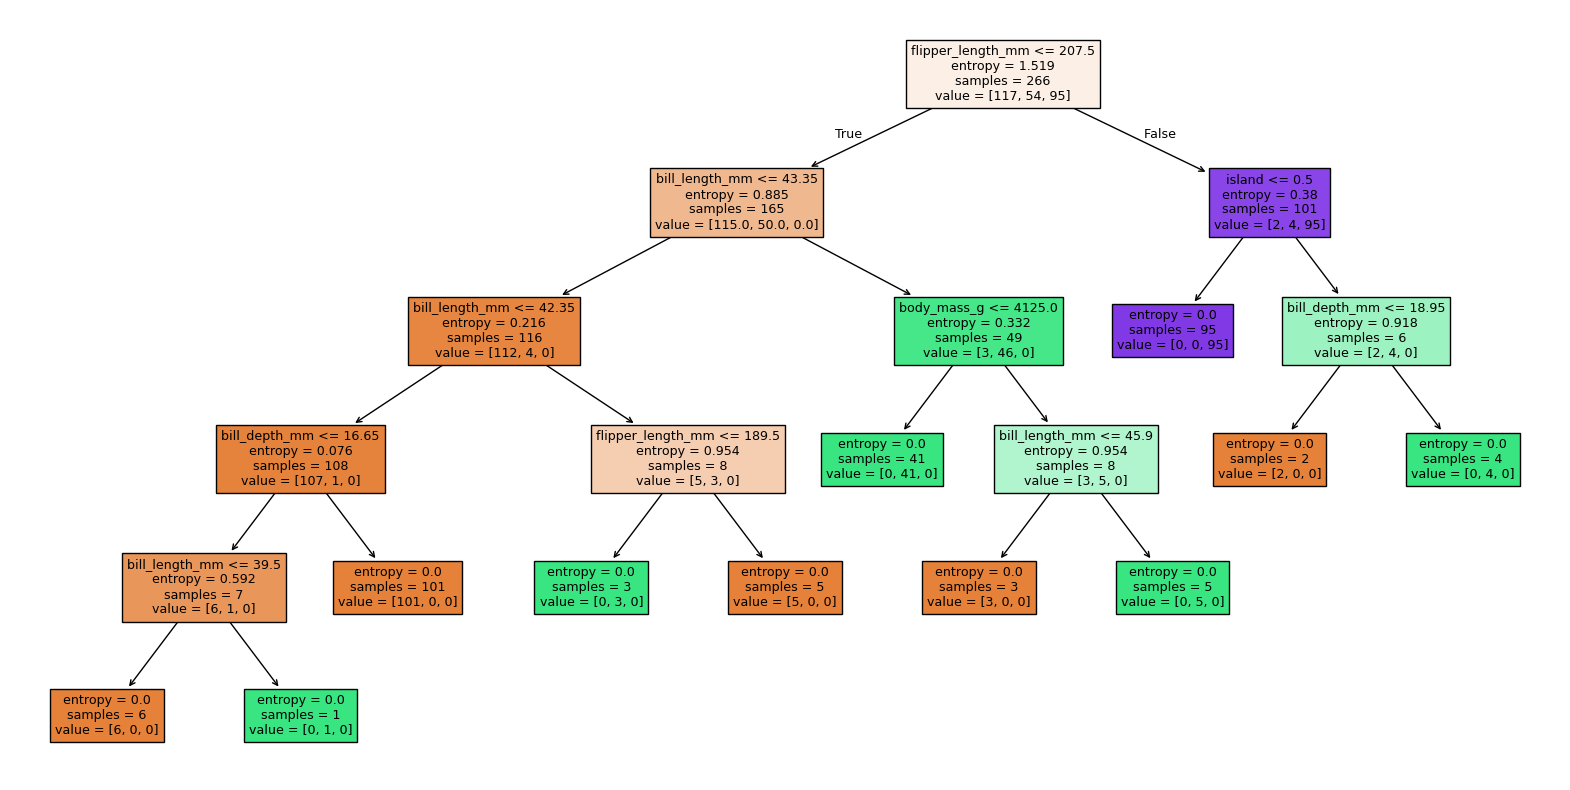

In [133]:
from sklearn import tree

plt.figure(figsize=(20,10))
features = df.columns[1:]
tree.plot_tree(dtmodel, feature_names = features, filled=True);

In [144]:

for i in zip(dtmodel.feature_importances_, features):
  print(i)

(np.float64(0.08127613256984915), 'island')
(np.float64(0.311129743653628), 'bill_length_mm')
(np.float64(0.023662388434774497), 'bill_depth_mm')
(np.float64(0.5625278569670554), 'flipper_length_mm')
(np.float64(0.021403878374692934), 'body_mass_g')
